<a href="https://colab.research.google.com/github/Maisha1714/CodeAlpha_Credit_scrong/blob/main/Credit_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [11]:
df = pd.read_csv("train.csv", low_memory=False)

In [12]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [13]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7474 non-null   object 
 1   Customer_ID               7474 non-null   object 
 2   Month                     7473 non-null   object 
 3   Name                      6742 non-null   object 
 4   Age                       7473 non-null   object 
 5   SSN                       7473 non-null   object 
 6   Occupation                7473 non-null   object 
 7   Annual_Income             7473 non-null   object 
 8   Monthly_Inhand_Salary     6376 non-null   float64
 9   Num_Bank_Accounts         7473 non-null   float64
 10  Num_Credit_Card           7473 non-null   float64
 11  Interest_Rate             7473 non-null   float64
 12  Num_of_Loan               7473 non-null   object 
 13  Type_of_Loan              6568 non-null   object 
 14  Delay_fr

In [15]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,1
Name,732
Age,1
SSN,1
Occupation,1
Annual_Income,1
Monthly_Inhand_Salary,1098
Num_Bank_Accounts,1


**Dataset consists of missing values.**

In [16]:

df.drop(["ID","Customer_ID","Name","SSN","Type_of_Loan"],axis=1,inplace=True)

In [17]:
df.isnull().sum()

,0
Month,1
Age,1
Occupation,1
Annual_Income,1
Monthly_Inhand_Salary,1098
Num_Bank_Accounts,1
Num_Credit_Card,1
Interest_Rate,1
Num_of_Loan,1
Delay_from_due_date,1


**There are still features that comprise of missing values. The categorical features must be converted to numerical in order to fill missing data**

In [18]:
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
num_cols = [feature for feature in df.columns if feature not in cat_cols]

In [19]:
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}")
    print('\n')

Month:
Number of unique values in the Month: 8
Unique values: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August' nan]


Age:
Number of unique values in the Age: 249
Unique values: ['23' '-500' '28_' '28' '34' '54' '55' '21' '31' '33' '34_' '7580' '30'
 '30_' '24' '24_' '44' '45' '40' '41' '32' '33_' '35' '35_' '36' '39' '37'
 '181' '20' '46' '26' '42' '19' '31_' '48' '995' '40_' '37_' '38' '54_'
 '5079' '43' '21_' '22' '6409' '16' '7080' '18' '849' '3885' '20_' '15'
 '27' '43_' '38_' '25' '3052' '14' '5342' '17' '18_' '4431' '2657' '2111_'
 '46_' '47' '1032' '16_' '19_' '47_' '456' '5717' '53_' '53' '56' '25_'
 '27_' '55_' '3169' '1191' '29' '42_' '7140' '48_' '49' '49_' '8233'
 '6955' '2534' '3115' '7657' '51' '50' '5112' '50_' '32_' '6452' '2744'
 '22_' '17_' '1439' '29_' '5795' '4872' '1772' '15_' '1383' '5657' '52'
 '1934' '51_' '8352' '3734' '26_' '2056' '39_' '7508' '2339' '14_' '8406'
 '1424' '36_' '6953' '5626' '4471' '548' '44_' '769' '5490' '525' '4202'
 '3665

In [20]:
df.drop(df[df["Occupation"]=='_______'].index,inplace=True)
df.drop(df[df["Credit_Mix"]=='_'].index,inplace=True)

In [21]:
df["Month"].value_counts()

,count
Month,
July,716
March,706
August,701
January,698
February,689
June,687
May,676
April,666


<ipython-input-26-f82ae8391dad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Month",data=df,palette="Dark2")


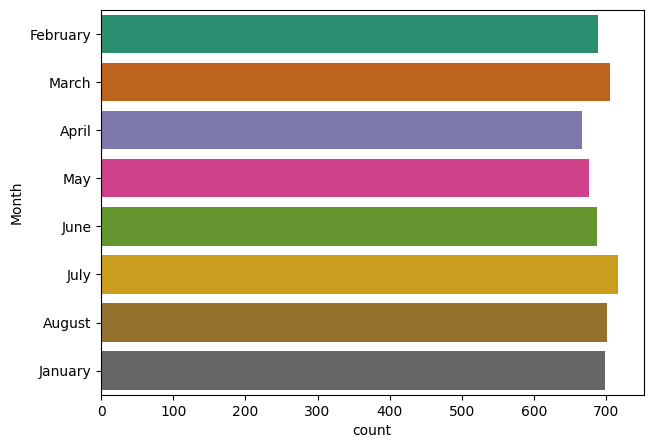

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(y="Month",data=df,palette="Dark2")
plt.show()

In [27]:
month_mapping = {
   'January': 1,
    'February': 2,
    'March': 3,
    "April":4,
    "May":5,
    "June":6,
    "July":7,
    "August":8}
df['Month'] = df['Month'].replace(month_mapping)

In [28]:
df["Occupation"].value_counts()

,count
Occupation,
Journalist,439
Musician,409
Media_Manager,400
Lawyer,392
Architect,387
Doctor,381
Entrepreneur,374
Scientist,373
Writer,370


<ipython-input-29-616ed9fd27b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Occupation",data=df,palette="Set1")


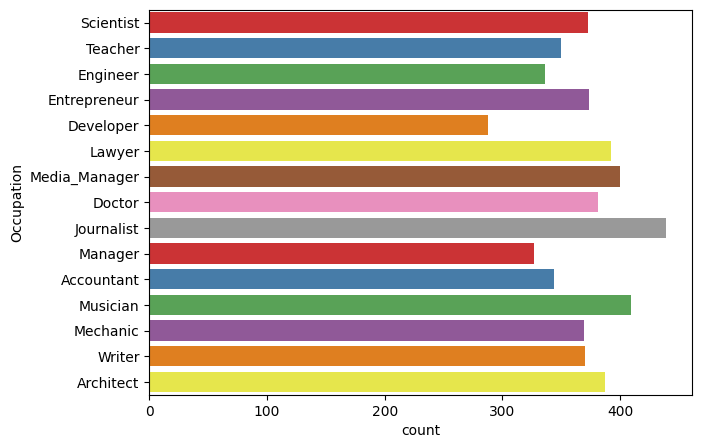

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(y="Occupation",data=df,palette="Set1")
plt.show()

In [30]:
occupation_mapping = {
    'Lawyer': 1,
    'Architect': 2,
    'Engineer': 3,
    'Scientist': 4,
    'Mechanic': 5,
    'Accountant': 6,
    'Developer': 7,
    'Media_Manager': 8,
    'Teacher': 9,
    'Entrepreneur': 10,
    'Doctor': 11,
    'Journalist': 12,
    'Manager': 13,
    'Musician': 14,
    'Writer': 15
}

df['Occupation'] = df['Occupation'].replace(occupation_mapping)


In [31]:
df["Credit_Mix"].value_counts()

,count
Credit_Mix,
Standard,2465
Good,1737
Bad,1337


<ipython-input-32-008a466b7af6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Credit_Mix",data=df,palette="inferno")


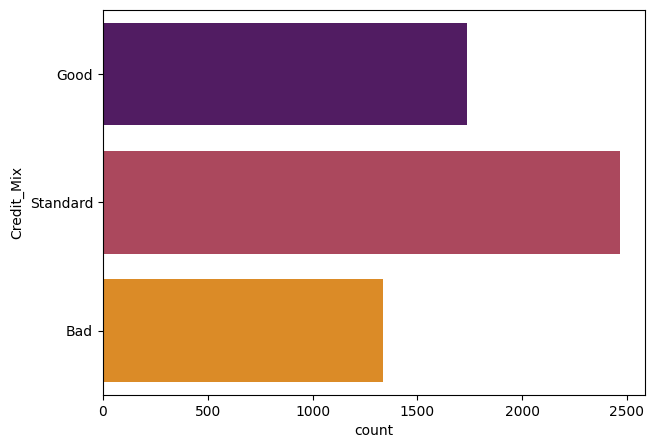

In [32]:
plt.figure(figsize=(7,5))
sns.countplot(y="Credit_Mix",data=df,palette="inferno")
plt.show()

In [ ]:
credit_map={"Good":1,"Standard":2,"Bad":3}
df['Credit_Mix'] = df['Credit_Mix'].replace(credit_map)

In [33]:
df["Payment_Behaviour"].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,1373
High_spent_Medium_value_payments,1001
Low_spent_Medium_value_payments,776
High_spent_Large_value_payments,741
High_spent_Small_value_payments,636
Low_spent_Large_value_payments,571
!@9#%8,441


<ipython-input-34-68a248399392>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Payment_Behaviour",data=df,palette="inferno")


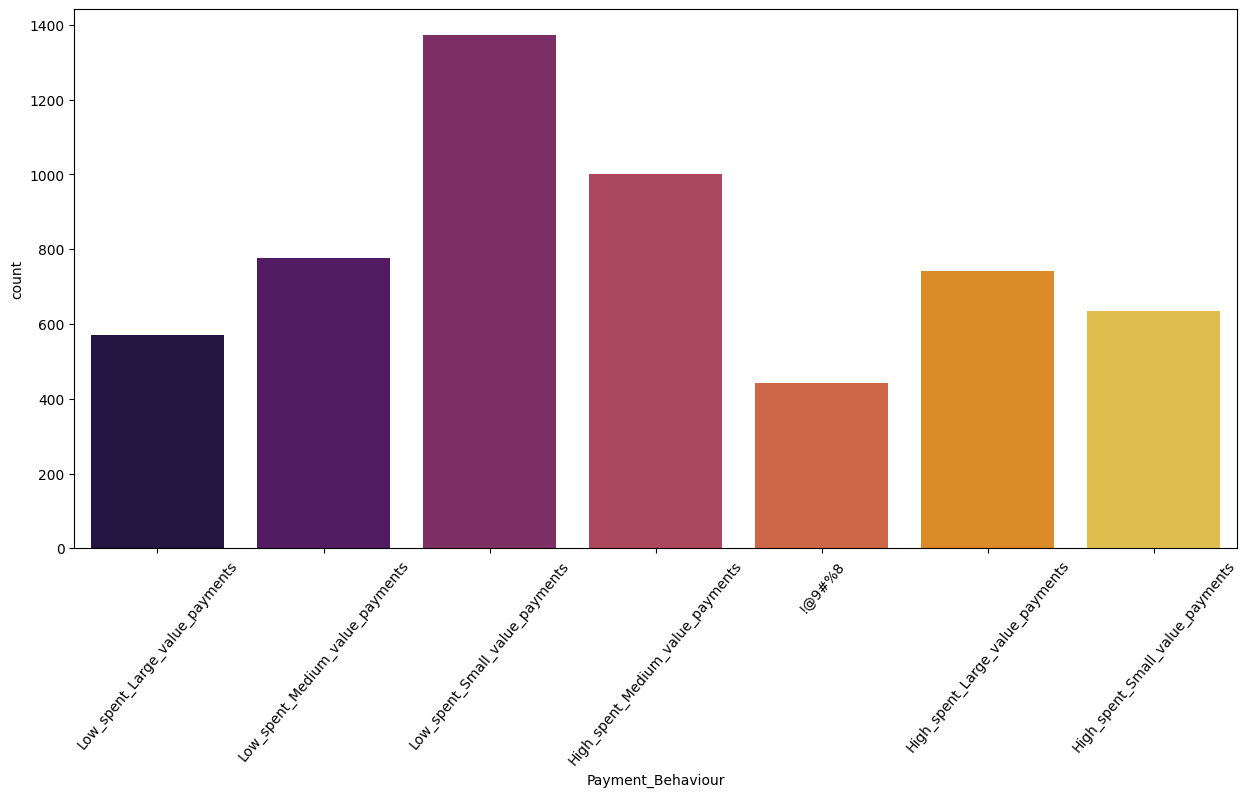

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(x="Payment_Behaviour",data=df,palette="inferno")
plt.xticks(rotation=50)
plt.show()

In [35]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [37]:
category_mapping = {
    'Low_spent_Small_value_payments':1,
    'High_spent_Medium_value_payments':2,
    'Low_spent_Medium_value_payments': 3,
    'High_spent_Large_value_payments': 4,
    'High_spent_Small_value_payments': 5,
    'Low_spent_Large_value_payments': 6
}
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(category_mapping)

In [36]:
df["Payment_of_Min_Amount"].value_counts()

,count
Payment_of_Min_Amount,
Yes,2895
No,1971
NM,673


<ipython-input-45-8d7613e66dd4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Payment_of_Min_Amount",data=df,palette="hot")


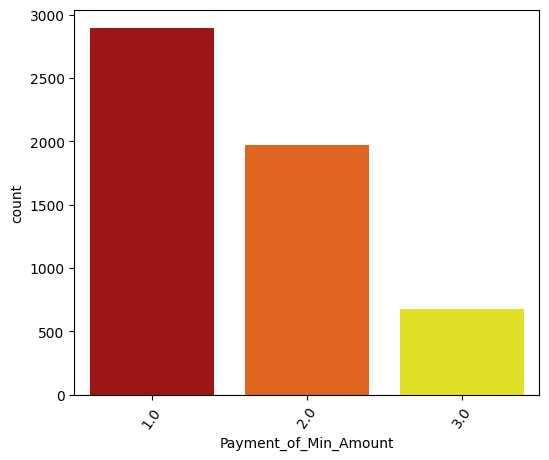

In [45]:
plt.figure(figsize=(6,5))
sns.countplot(x="Payment_of_Min_Amount",data=df,palette="hot")
plt.xticks(rotation=55)
plt.show()

In [42]:
pay_map={"Yes":1,"No":2,"NM":3}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(pay_map)

In [43]:
df["Credit_Score"].value_counts()

,count
Credit_Score,
Standard,2839
Poor,1661
Good,1039


<ipython-input-46-e267822938ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_Score",data=df,palette="spring")


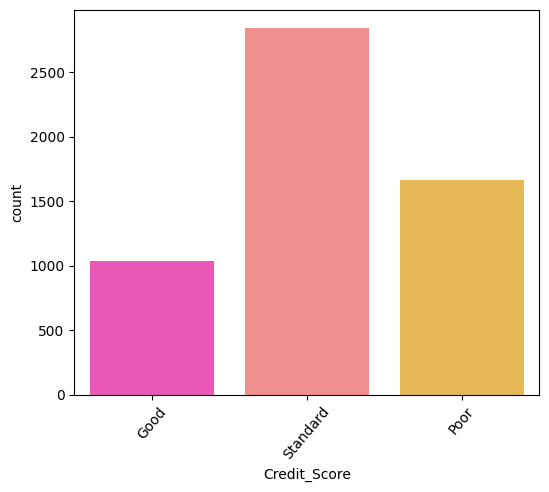

In [46]:
plt.figure(figsize=(6,5))
sns.countplot(x="Credit_Score",data=df,palette="spring")
plt.xticks(rotation=50)
plt.show()

In [47]:
score_map={"Standard":0,"Poor":1,"Good":2}
df['Credit_Score'] = df['Credit_Score'].replace(score_map)

## Handling Missing Data


In [48]:
df.isnull().sum()

,0
Month,1
Age,1
Occupation,1
Annual_Income,1
Monthly_Inhand_Salary,797
Num_Bank_Accounts,1
Num_Credit_Card,1
Interest_Rate,1
Num_of_Loan,1
Delay_from_due_date,1


In [49]:
mean_salary = df["Monthly_Inhand_Salary"].mean()
df["Monthly_Inhand_Salary"].fillna(mean_salary, inplace=True)

In [50]:
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"], errors="coerce")
n_mean=df["Num_of_Delayed_Payment"].mean()
df["Num_of_Delayed_Payment"].fillna(n_mean, inplace=True)

In [51]:
in_mean=df["Num_Credit_Inquiries"].mean()
df["Num_Credit_Inquiries"].fillna(in_mean, inplace=True)

In [52]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.extract(r'(\d+)')

In [53]:
df["Credit_History_Age"] = pd.to_numeric(df["Credit_History_Age"], errors="coerce")
credit_mean=df["Credit_History_Age"].mean()
df["Credit_History_Age"].fillna(credit_mean, inplace=True)

In [54]:
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"], errors="coerce")
invest_mean=df["Amount_invested_monthly"].mean()
df["Amount_invested_monthly"].fillna(invest_mean, inplace=True)

In [55]:
df.dropna(subset=["Payment_Behaviour"], inplace=True)

In [56]:
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors="coerce")
month_mean=df["Monthly_Balance"].mean()
df["Monthly_Balance"].fillna(month_mean, inplace=True)

In [57]:
df.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0


In [58]:
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"], errors="coerce")
an_mean=df["Annual_Income"].mean()
df["Annual_Income"].fillna(an_mean, inplace=True)

In [59]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [60]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)  # Replace '_' with 0
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors="coerce")
c_mean=df["Changed_Credit_Limit"].mean()
df["Changed_Credit_Limit"].fillna(c_mean, inplace=True)

In [61]:
df['Age'] = df['Age'].replace('-500',np.nan)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
age_mean=df["Age"].mean()
df["Age"].fillna(age_mean, inplace=True)

In [62]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors="coerce")
num_mean=df["Num_of_Loan"].mean()
df["Num_of_Loan"].fillna(num_mean, inplace=True)

In [93]:
df['Delay_from_due_date'] = df['Delay_from_due_date'].abs()

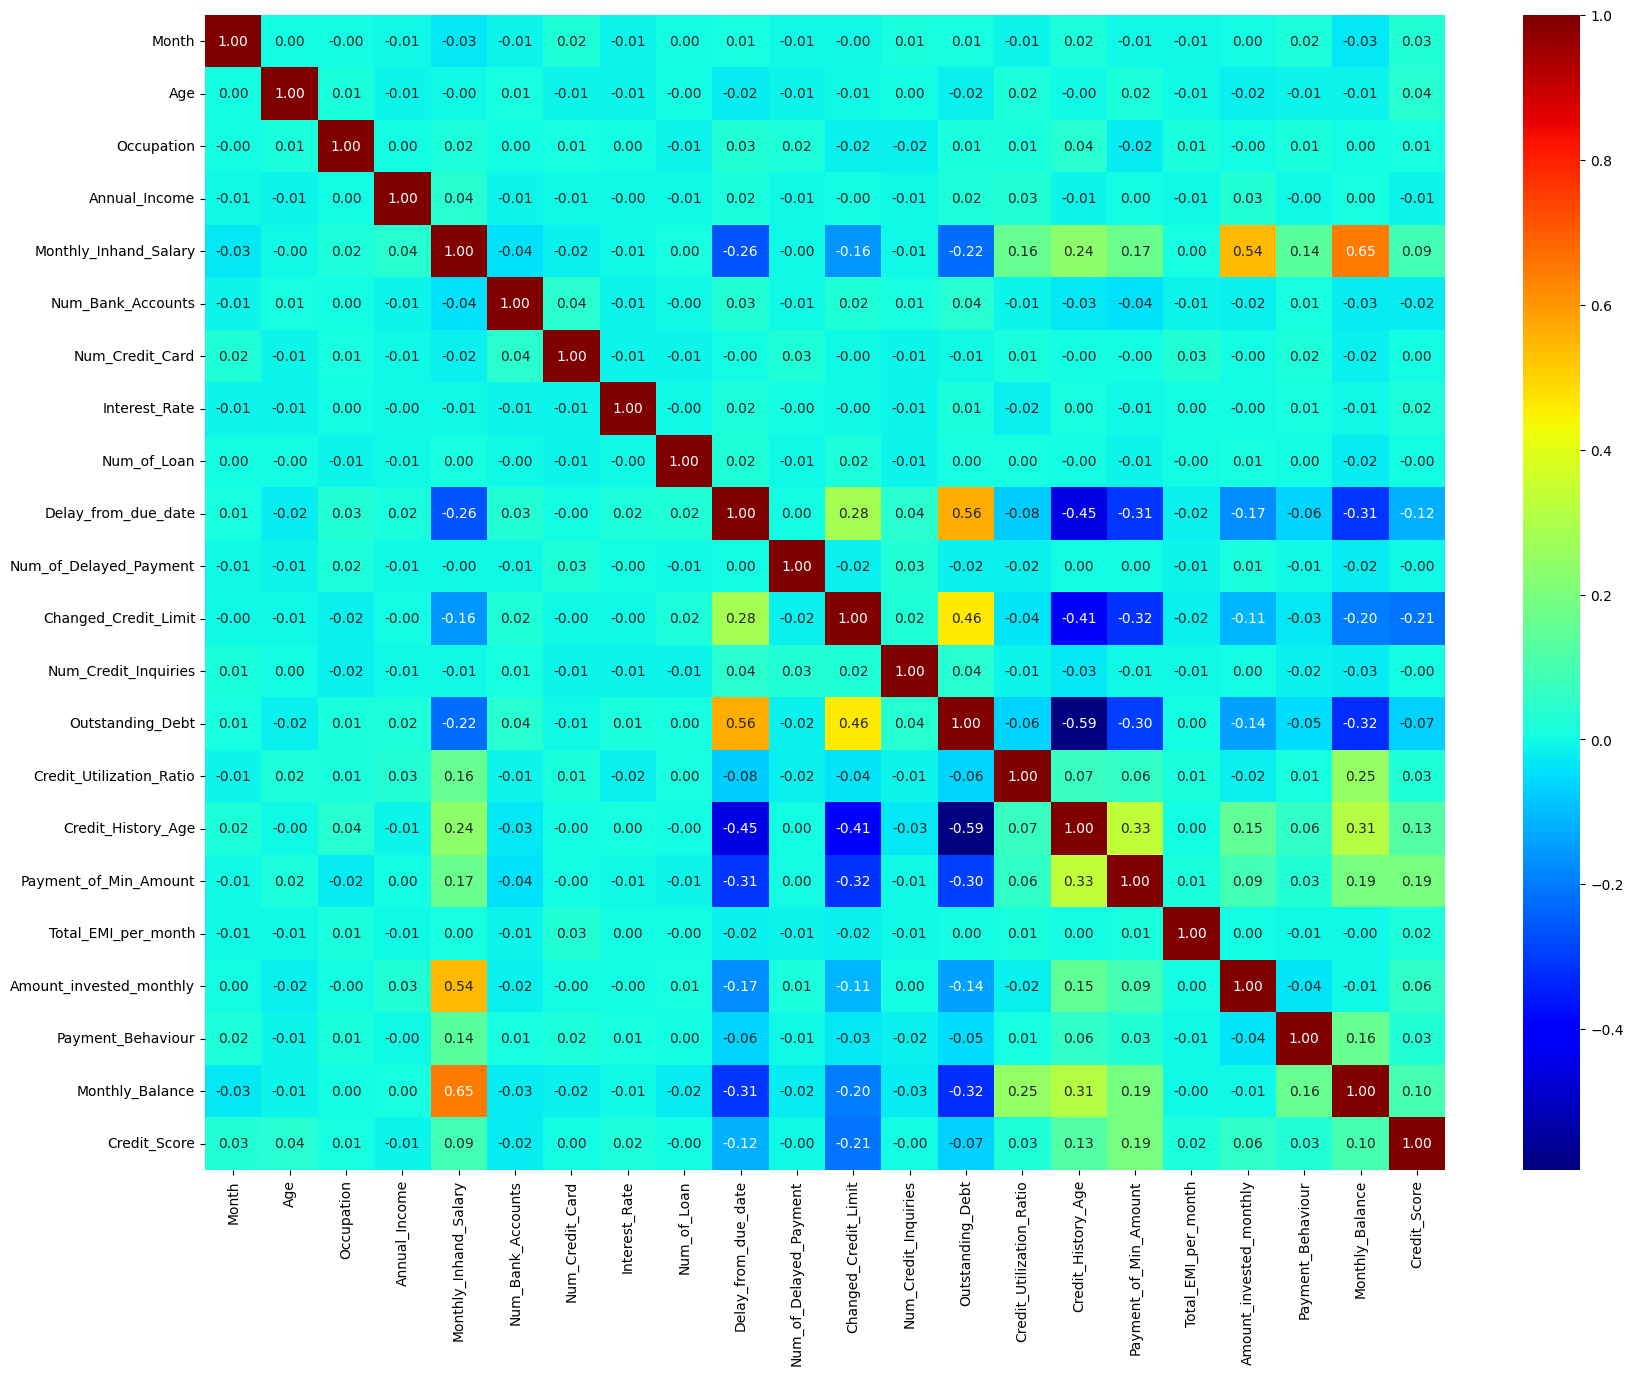

In [96]:
df = df.select_dtypes(include=[float, int])
cr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cr,annot=True,fmt=".2f",cmap="jet")
plt.show()

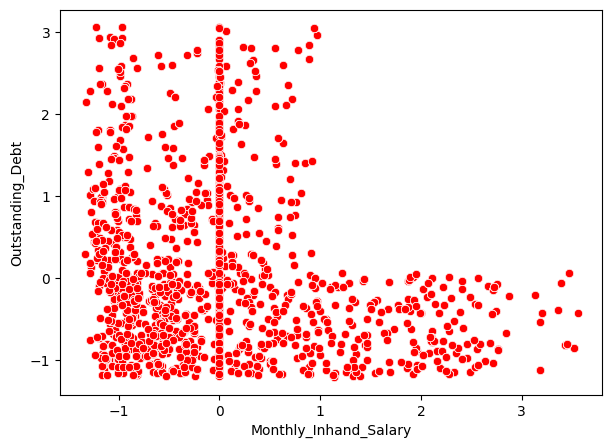

In [97]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Monthly_Inhand_Salary", y="Outstanding_Debt",color="red")
plt.show()

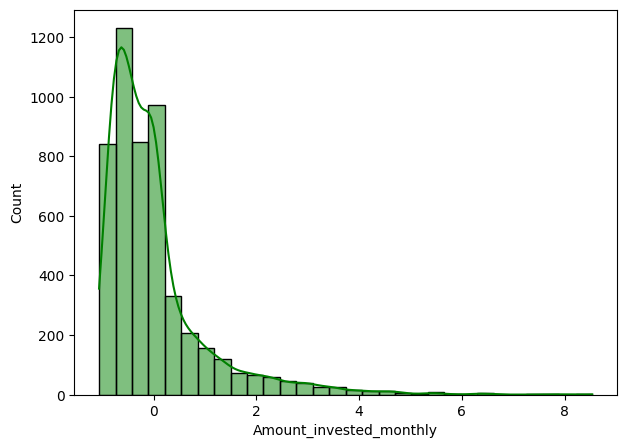

In [98]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Amount_invested_monthly", kde=True,bins=30,color="green")
plt.show()

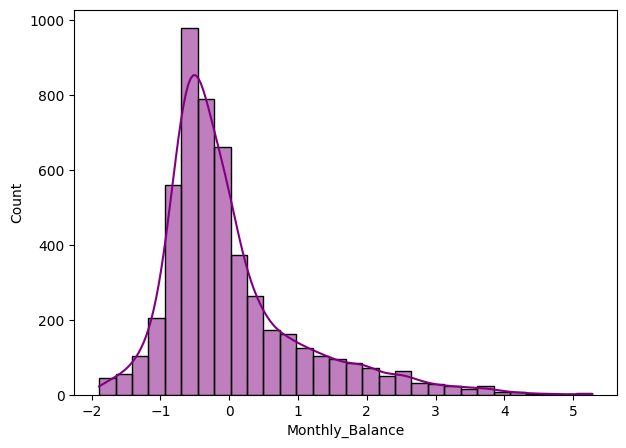

In [99]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Monthly_Balance", kde=True,bins=30,color="purple")
plt.show()

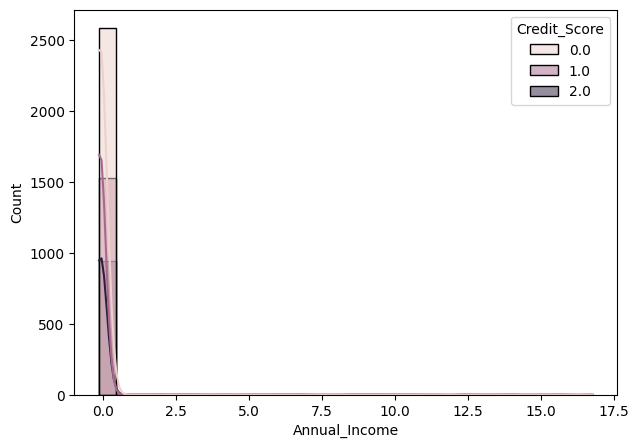

In [100]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Annual_Income", kde=True,bins=30,hue="Credit_Score")
plt.show()

In [101]:
columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                    'Amount_invested_monthly', 'Monthly_Balance']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [102]:
x=df.drop("Credit_Score",axis=1)
y=df["Credit_Score"]

In [103]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Extreme Gradient Boosting Classifier

In [105]:
xgb_classifier = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,eval_metric='logloss', objective='binary:logistic', booster='gbtree')
xgb_classifier.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [106]:
pred=xgb_classifier.predict(xtest)
xgb_ac=accuracy_score(ytest,pred)
print("XGB Accuracy Score :",xgb_ac)

XGB Accuracy Score : 0.7


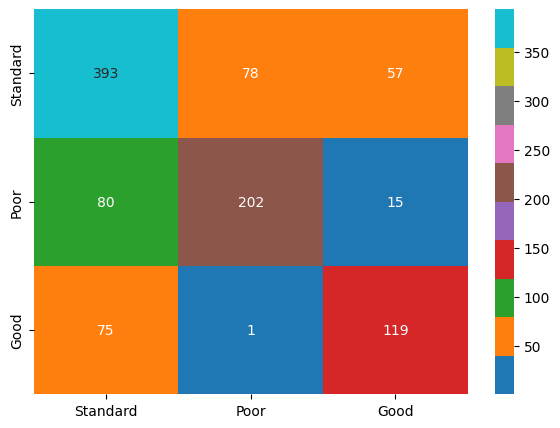

In [107]:
cf_mat=confusion_matrix(ytest, pred)
label_name=["Standard","Poor","Good"]
plt.figure(figsize=(7,5))

sns.heatmap(cf_mat,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="tab10")
plt.show()

In [108]:
print(classification_report(ytest,pred,target_names=label_name))

              precision    recall  f1-score   support

    Standard       0.72      0.74      0.73       528
        Poor       0.72      0.68      0.70       297
        Good       0.62      0.61      0.62       195

    accuracy                           0.70      1020
   macro avg       0.69      0.68      0.68      1020
weighted avg       0.70      0.70      0.70      1020



In [109]:
x_loss=xgb_classifier.predict_proba(xtest)
logloss = log_loss(ytest,x_loss)
print("Log Loss:", logloss)

Log Loss: 0.6539489614007555


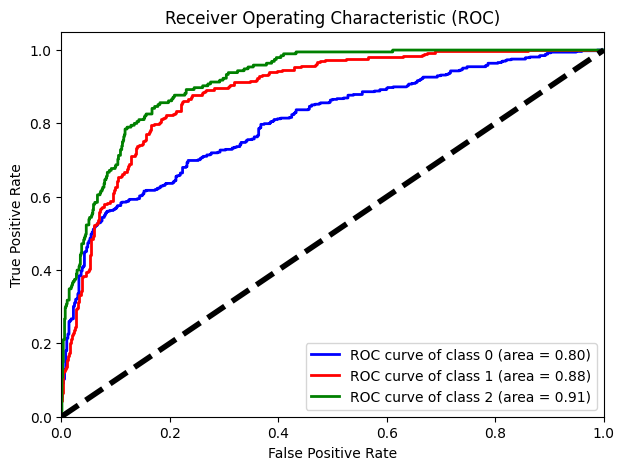

In [110]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest,x_loss[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(7,5))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### LightGBM (Light Gradient Boosting Machine)

In [111]:
lgb_classifier = LGBMClassifier(boosting_type='gbdt', num_leaves=31,max_depth=-1,learning_rate=0.1,
                                n_estimators=100,

                                random_state=42,
                                objective='multiclass',  # Multi-class objective
                                metric='multi_logloss')

In [112]:
lgb_classifier.fit(xtrain, ytrain, eval_set=[(xtest, ytest)])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2482
[LightGBM] [Info] Number of data points in the train set: 4078, number of used features: 21
[LightGBM] [Info] Start training from score -0.671798
[LightGBM] [Info] Start training from score -1.188884
[LightGBM] [Info] Start training from score -1.689297


LGBMClassifier(metric='multi_logloss', objective='multiclass', random_state=42)

In [113]:
pred0=lgb_classifier.predict(xtest)
acc0=accuracy_score(ytest,pred0)
print("accuracy score :",acc0)

accuracy score : 0.7686274509803922


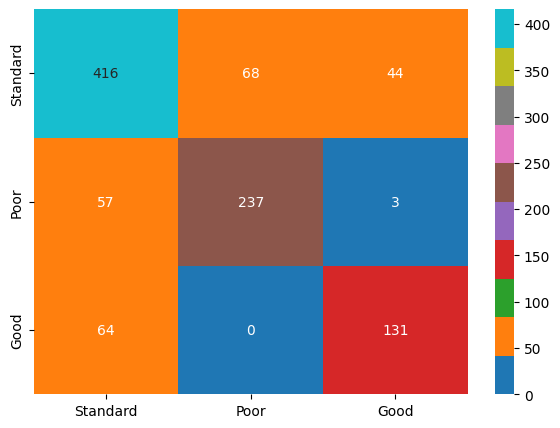

In [114]:
cf_mat=confusion_matrix(ytest, pred0)
label_name=["Standard","Poor","Good"]
plt.figure(figsize=(7,5))
sns.heatmap(cf_mat,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="tab10")
plt.show()

In [115]:
print(classification_report(ytest,pred0,target_names=label_name))

              precision    recall  f1-score   support

    Standard       0.77      0.79      0.78       528
        Poor       0.78      0.80      0.79       297
        Good       0.74      0.67      0.70       195

    accuracy                           0.77      1020
   macro avg       0.76      0.75      0.76      1020
weighted avg       0.77      0.77      0.77      1020



In [116]:
lgb=lgb_classifier.predict_proba(xtest)
logloss2 = log_loss(ytest,lgb)
print("Log Loss:", logloss2)

Log Loss: 0.5336113461047944


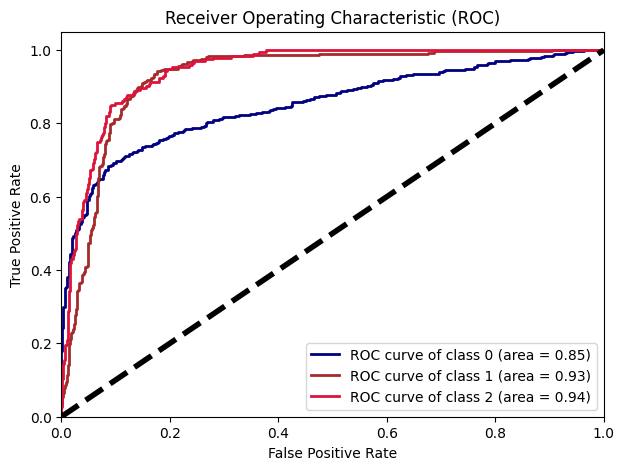

In [117]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest,lgb[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(7,5))
colors = ['navy', 'brown', 'crimson']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Model Evaluation

<ipython-input-118-de8547a37b67>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Model', x='Accuracy', data=results_df, palette='viridis')


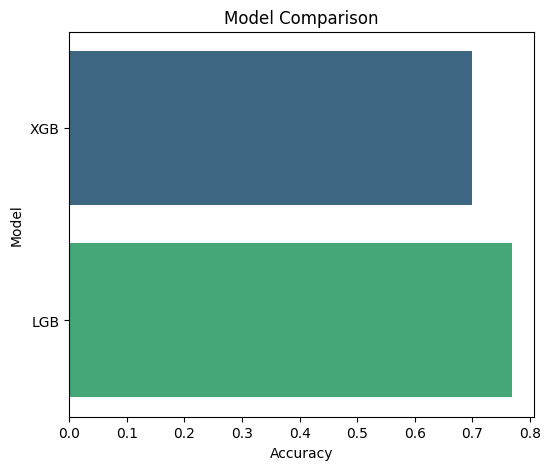

In [118]:
results = {'XGB': xgb_ac,'LGB': acc0}
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
plt.figure(figsize=(6,5))
sns.barplot(y='Model', x='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison')
plt.show()


<ipython-input-119-9b94bc6a6496>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Model', x='Log Loss', data=log_loss_df, palette='viridis')


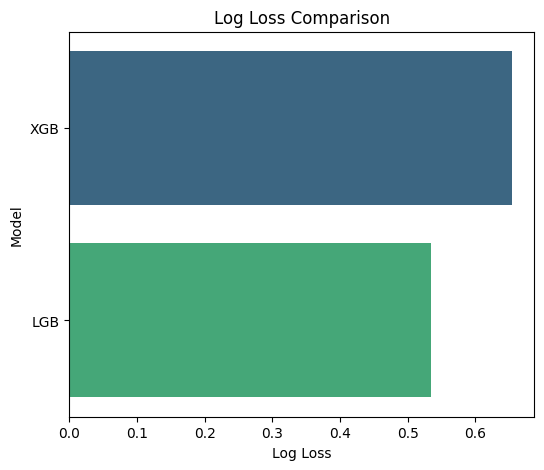

In [119]:
log_loss_results = {'XGB': logloss, 'LGB': logloss2}
log_loss_df = pd.DataFrame(list(log_loss_results.items()), columns=['Model', 'Log Loss'])
plt.figure(figsize=(6,5))
sns.barplot(y='Model', x='Log Loss', data=log_loss_df, palette='viridis')
plt.title('Log Loss Comparison')
plt.show()


In [120]:
from xgboost import XGBClassifier
import joblib

# Assuming you have your trained XGBoost model in the xgb_classifier variable
xgb_classifier = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, eval_metric='logloss', objective='binary:logistic', booster='gbtree')
xgb_classifier.fit(xtrain, ytrain)  # Train the model, replace with your actual training data

# Save the model as a pkl file
model_filename = "xgb_model.pkl"
joblib.dump(xgb_classifier, model_filename)

print(f"XGBoost model saved as {model_filename}")


XGBoost model saved as xgb_model.pkl


### **Hence, LGBM is the most feasible model to train this dataset.**

## Model Saving

In [122]:
from lightgbm import LGBMClassifier
import joblib

lgb_classifier = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
    objective='multiclass',
    metric='multi_logloss'
)

lgb_classifier.fit(xtrain, ytrain)

model_filename = "lgb_model.pkl"
joblib.dump(lgb_classifier, model_filename)

print(f"LGBMClassifier model saved as {model_filename}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2482
[LightGBM] [Info] Number of data points in the train set: 4078, number of used features: 21
[LightGBM] [Info] Start training from score -0.671798
[LightGBM] [Info] Start training from score -1.188884
[LightGBM] [Info] Start training from score -1.689297
LGBMClassifier model saved as lgb_model.pkl
